In [ ]:
import sys
sys.path.append("..\..")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import auc, roc_curve
from sklearn.ensemble import RandomForestClassifier

from src.data.datasets.overlaps import OverlapsDataset

In [2]:
train_dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet", split="train")
test_dataset = OverlapsDataset.from_path("..\\..\\datasets\\PlagiNet", split="test")

Extracting non-overlapping features: 100%|██████████| 198/198 [00:04<00:00, 41.68it/s]


In [10]:
classifier = RandomForestClassifier(class_weight='balanced', max_depth=4, random_state=42)

In [11]:
X_train = train_dataset.features
X_test = test_dataset.features
y_train = train_dataset.targets
y_test = test_dataset.targets

In [12]:
classifier.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=4, random_state=42)

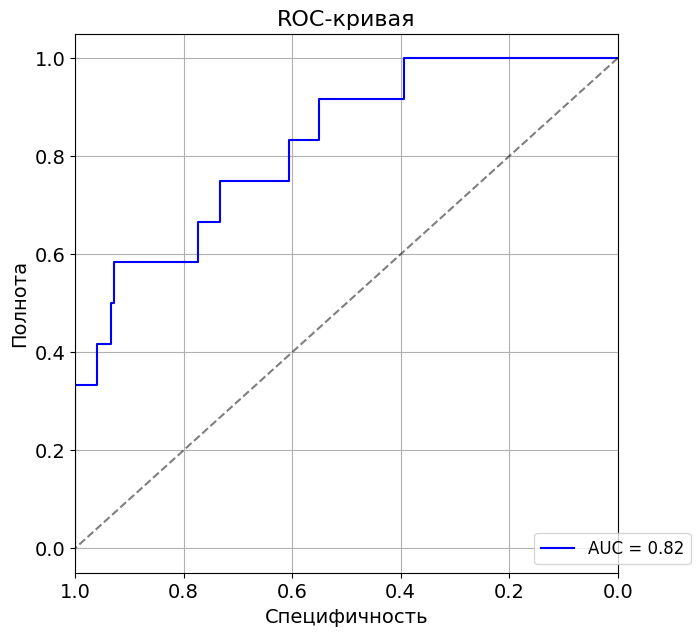

In [13]:
y_pred_proba = classifier.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 7))

plt.plot(1-fpr, tpr, label=f"AUC = {roc_auc:.2f}", color="blue")
plt.plot([0, 1], [1, 0], color="black", linestyle="--", alpha=0.5)
plt.xlabel("Специфичность", fontsize=14)
plt.ylabel("Полнота", fontsize=14)
plt.xlim((1, 0))
plt.legend(loc="lower right", bbox_to_anchor=(1.15, 0), fontsize=12)
plt.grid(True)
plt.title("ROC-кривая", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)

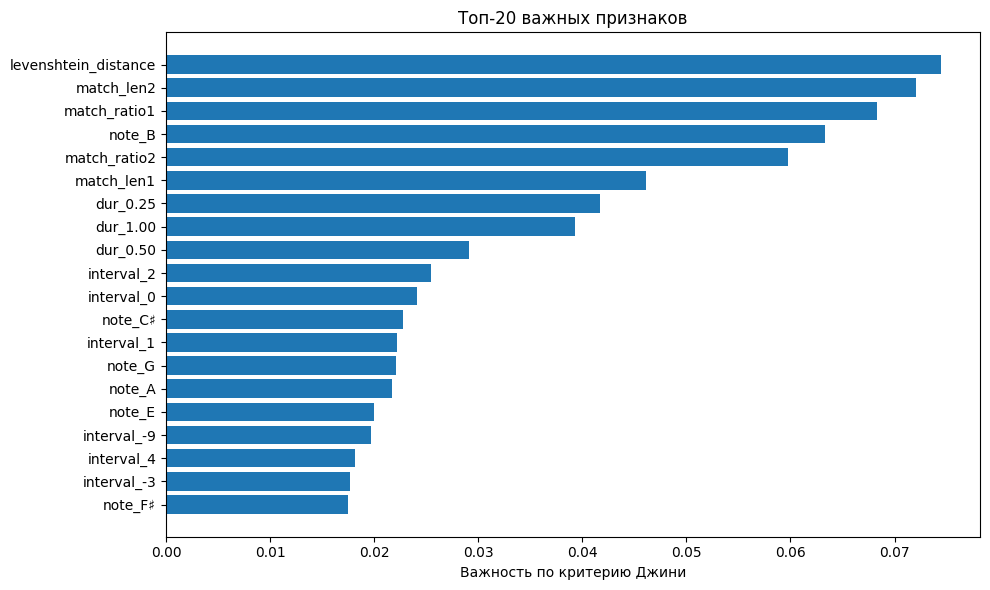

In [14]:
importance = np.abs(classifier.feature_importances_)
feature_importance = dict(zip(train_dataset.feature_names, importance))
feature_importance = {k: v for k, v in sorted(feature_importance.items(), key=lambda item: item[1], reverse=True)}

top_features = list(feature_importance.items())[:20]

plt.figure(figsize=(10, 6))
plt.barh([f[0] for f in top_features], [f[1] for f in top_features])
plt.xlabel('Важность по критерию Джини')
plt.title('Топ-20 важных признаков')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

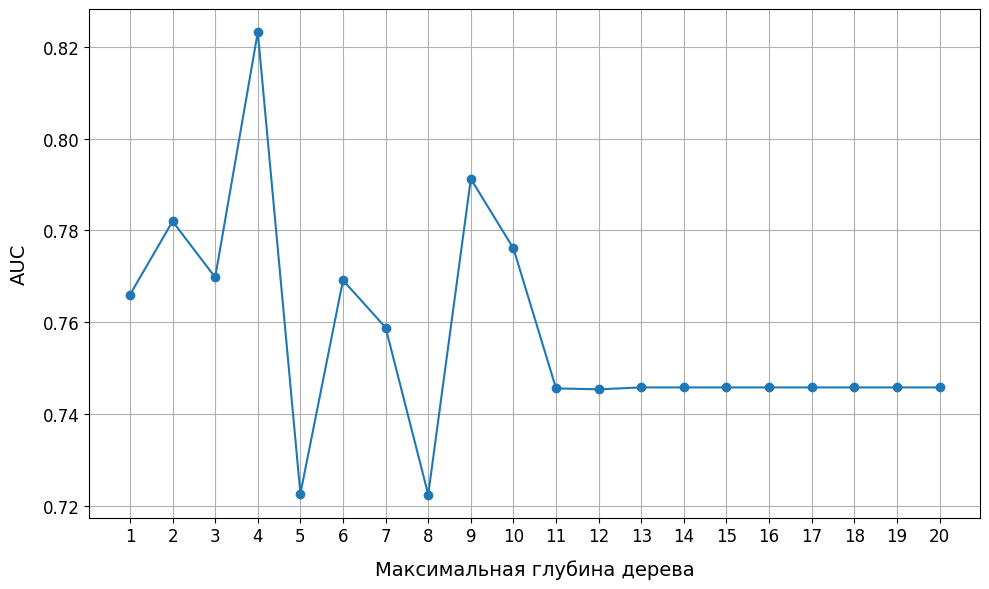

In [15]:
MAX_DEPTHS = range(1, 21)

depths = []
aucs = []

for max_depth in MAX_DEPTHS:
    classifier = RandomForestClassifier(class_weight='balanced', max_depth=max_depth, random_state=42)
    classifier.fit(X_train, y_train)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    depths.append(max_depth)
    aucs.append(roc_auc)

plt.figure(figsize=(10, 6))
plt.plot(depths, aucs, marker='o')
plt.xlabel('Максимальная глубина дерева', fontsize=14, labelpad=10)
plt.ylabel('AUC', fontsize=14, labelpad=10)
plt.grid(True)
plt.xticks(depths, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()